# Python正则表达式

模式字符串使用特殊的语法来表示一个正则表达式：

字母和数字表示他们自身。一个正则表达式模式中的字母和数字匹配同样的字符串。

多数字母和数字前加一个反斜杠时会拥有不同的含义。

标点符号只有被转义时才匹配自身，否则它们表示特殊的含义。

反斜杠本身需要使用反斜杠转义。

由于正则表达式通常都包含反斜杠，所以你最好使用原始字符串来表示它们。模式元素(如 r'\t'，等价于 '\\t')匹配相应的特殊字符。

1.在正则表达式中，如果直接给出字符，就是精确匹配。<p>
    
    
用**`\d`** 可以匹配一个数字，**``\w``** 可以匹配一个字母或数字, **`.`** 可以匹配任意字符<p>
    
1)**`00\d`** 可以匹配 **`007`** ，但无法匹配**`00A`** ；

2)**`\d\d\d`** 可以匹配 **`010`** ；

3)**`\w\w\d`** 可以匹配 **`py3`** ；

4)**`py.`** 可以匹配 **`pyc`** 、**`pyo`** 、 **`py!`**等等。
    
2.要匹配变长的字符。<p>
    
用 **`*`** 表示任意个字符（包括0个），用 **`+`** 表示至少一个字符（匹配+前面的子表达式一次或者多次），用 **`?`** 表示0个或1个字符，用 **`{n}`** 表示n个字符, 用 **`{n,m}`** 表示n-m个字符。<p>

1）**`\d{3}\s+\d{3,8}`**

2）**`\d{3}`**\ 表示匹配3个数字，例如'010'；

3）**`\s`** 可以匹配一个空格（也包括Tab等空白符），所以 **`\s+`** 表示至少有一个空格，例如匹配' '，' '等；

4) **`\S`** 与 **`\s`** 相反，**`[\s\S]`**表示所有的字符，完全的，一字不漏的。

5）**`\d{3,8}`** 表示3-8个数字，例如'1234567'。

6)  **`?`** 匹配前面的子表达式零次或一次，或指明一个非贪婪限定符。要匹配 ? 字符，请使用 \?。

综合起来，上面的正则表达式可以匹配以任意个空格隔开的带区号的电话号码。

如果要匹配'010-12345'这样的号码呢？由于'-'是特殊字符，在正则表达式中，要用'\'转义，所以，上面的正则是\d{3}\-\d{3,8}。

但是，仍然无法匹配'010 - 12345'，因为带有空格。所以我们需要更复杂的匹配方式。

5）**`A|B`** 可以匹配A或B，所以(P|p)ython可以匹配'Python'或者'python'。

6）**`^`** 表示行的开头，**`^\d`** 表示必须以数字开头。

7）**`$`** 表示行的结束， **`\d$`** 表示必须以数字结束

In [1]:
import re

### re.match函数
**尝试从字符串的起始位置匹配一个陌模式，如果不是起始位置匹配成功的话，match()就返回None**<p>

**函数语法：**<p>
**`re.match(pattren, string, flags=0)`**<p>
函数参数说明：<p>
    
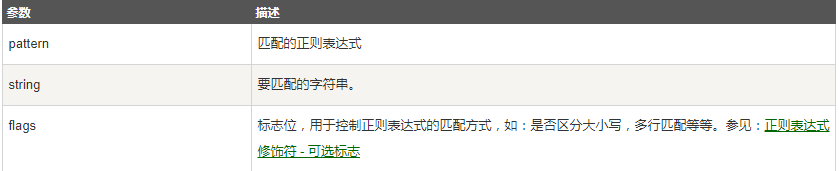

**匹配成功re.match方法返回一个匹配对象，否则返回None**<p>

我们可以使用group(num)或group()匹配对象函数来获取匹配表达式。

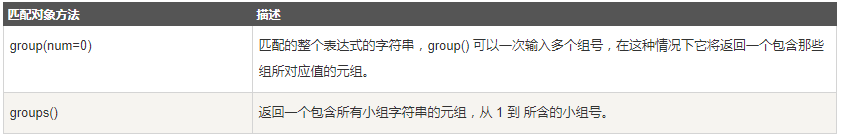

In [9]:
print(re.match('www', 'www.runoob.com').span())  # 在起始位置匹配
print(re.match('com', 'www.runoob.com'))         # 不在起始位置匹配

(0, 3)
None


In [101]:
import re
line = "Cats are smarter than dogs"
##  用()表示的是要提取的分组(group)，也就是提取子串
#  该正则表达式里有两个()，所以定义了两个分组(group)，提取出的第一个子串为Cats，提出出的第二个为smarter 
###  r为python前缀
### . 代表任意字符， * 代表0到无穷个字符（任意个字符）， ？ 表示非贪婪模式
###   .*  匹配任意字符多次     .*?  匹配尽量少的任意字符
matchObj = re.match(r'(.*) are (.*?) .*', line, re.M|re.I)   # re.I  使匹配对大小写不敏感  re.M  多行匹配，影响 ^ 和 $
print(matchObj)
if matchObj:
    print("matchObj.group():", matchObj.group())    ## 默认参数为0，输出所有子串
    print("matchObj.group(1):", matchObj.group(1))  ## 提取匹配字符中的第一个子串
    print("matchObj.group(2):", matchObj.group(2))  ## 提取匹配字符中的第二个子串
else:
    print("No match!!!")

<re.Match object; span=(0, 26), match='Cats are smarter than dogs'>
matchObj.group(): Cats are smarter than dogs
matchObj.group(1): Cats
matchObj.group(2): smarter


In [60]:
line = "Cats/are/smarter/than dogs"

matchObj = re.match(r'[/|,]', line, re.M|re.I)   # re.I  使匹配对大小写不敏感  re.M  多行匹配，影响 ^ 和 $
# matchObj = re.match(r'^(.*?),(.*?)$', line, re.I)
# matchObj = re.match(r'^(.*?) (.*?)$', line1, re.M)
print(matchObj)
if matchObj:
    print("matchObj.group():", matchObj.group())    ## 默认参数为0，输出所有子串
    print("matchObj.group(1):", matchObj.group(1))  ## 提取匹配字符中的第一个子串
    print("matchObj.group(2):", matchObj.group(2))  ## 提取匹配字符中的第二个子串
else:
    print("No match!!!")

None
No match!!!


In [3]:
line = "Cats/are/smarter/than,dogs"

matchObj = re.split(r'[/|,| ]', line, re.M|re.I)
matchObj

['Cats', 'are', 'smarter', 'than,dogs']

In [51]:
m = re.match(r'^(\d{3})-(\d{3,8})$', '010-12345')
print(m)
print(m.group(0))
print(m.group(1))
print(m.group(2))

<re.Match object; span=(0, 9), match='010-12345'>
010-12345
010
12345


### 贪婪匹配
正则匹配默认是贪婪匹配，也就是匹配尽可能多的字符，在正则表达式中**加一个 ? ，**就能实现非贪婪匹配

In [67]:
# a = re.match(r'(\d+)(0*)$', '102300')    ## 贪婪匹配
a = re.match(r'(\d+?)(0*)$', '102300')   ## 非贪婪匹配
print(a)
print("-"* 20)
print(a.group(0))
print("-"* 20)
print(a.group(1))
print("-"* 20)
print(a.group(2))
print("-"* 20)



<re.Match object; span=(0, 6), match='102300'>
--------------------
102300
--------------------
1023
--------------------
00
--------------------


### re.search方法

re.search扫描整个字符串并返回第一个成功的匹配<p>
**函数语法：**<p>
**`re.search(pattern, string, flags=0)`**<p>
    
函数参数说明：

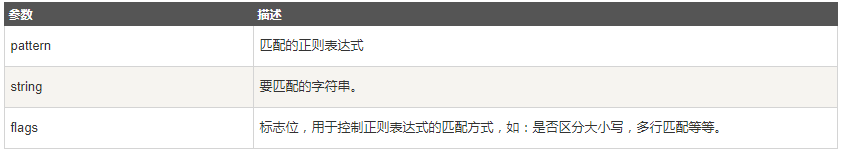

匹配成功re.search方法返回一个匹配的对象，否则返回None。<p>
同样可以使用group(num)或group()匹配对象函数获取匹配表达式。
    

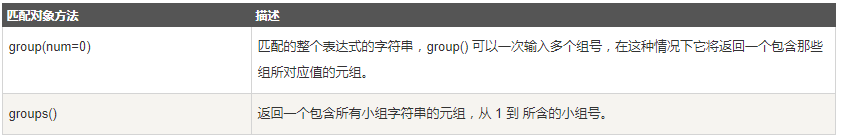

In [11]:
print(re.search('www', 'www.runoob.com').span())  # 在起始位置匹配
print(re.search('com', 'www.runoob.com').span())  # 不在起始位置匹配

(0, 3)
(11, 14)


In [13]:
line = "Cats are smarter than dogs";
 
searchObj = re.search( r'(.*) are (.*?) .*', line, re.M|re.I)  ##  用()表示的是要提取的分组(group)，也就是提取子串
#该正则表达式里有两个()，所以有两个分组(group)，第一个子串为Cats，第二个为smarter
 
if searchObj:
   print("searchObj.group() : ", searchObj.group())    ## 默认参数为0，输出所有子串 
   print("searchObj.group(1) : ", searchObj.group(1))  ## 提取匹配字符中的第一个子串
   print("searchObj.group(2) : ", searchObj.group(2))  ## 提取匹配字符中的第二个子串
else:
   print("Nothing found!!")

searchObj.group() :  Cats are smarter than dogs
searchObj.group(1) :  Cats
searchObj.group(2) :  smarter


**re.match与re.search的区别：**<p>

re.match**只匹配字符串的开始**，如果字符串开始不符合正则表达式，则匹配失败，返回None；<p>
    
re.search**匹配整个字符串**，直到找到一个匹配。

In [44]:
line = "Cat are smarter than dogs"

# matchObj = re.match(r'dogs', line, re.M|re.I)
matchObj = re.match(r'^\d{3}\-\d{3,8}$', '010 12345')
if matchObj:
    print("match  matchObj.group():", matchObj.group())
else:
    print("NO match!!!")
    
searchObj = re.search(r'dogs', line, re.M|re.I)
if searchObj:
    print("search  searchObj.group():", searchObj.group())
else:
    print("No search")

NO match!!!
search  searchObj.group(): dogs


## 检索与替换

### re.sub函数

用于**替换**字符串中的匹配项。<p>
**函数语法：**<p>
**`re.sub(pattern, repl, string, count=0, flags=0)`**<p>

**参数**<p>
pattern : 正则中的模式字符串。<p>
repl : 替换的字符串，也可为一个函数。<p>
string : 要被查找替换的原始字符串。<p>
count : 模式匹配后替换的最大次数，默认 0 表示替换所有的匹配。<p>

In [38]:
phone = "2004-959-559 # 这是一个国外电话号码"
 
# 删除字符串中的 Python注释 
num = re.sub(r'#.*$', "", phone)  #  $ 表示匹配字符串的末尾
print("电话号码是: ", num)
 
# 删除非数字(-)的字符串 
num = re.sub(r'\D', "", phone)  # \D 匹配一个非数字字符。等价于 [^0-9]。
print("电话号码是 : ", num)

电话号码是:  2004-959-559 
电话号码是 :  2004959559


In [42]:
# repl参数可以是一个函数

def double(matched):
    value = int(matched.group('value'))
    return str(value*2)

s = 'A23G4HFD567'
print(re.sub('(?P<value>\d+)', double, s))

A46G8HFD1134


### re.compile函数

功能：编译正则表达式，生成一个正则表达式（ Pattern ）对象，供 match() 和 search() 这两个函数使用<p>

**语法格式：**<p>

**`re.compile(pattern[, flags])`**<p>
    
参数： <p>
**pattern** : 一个字符串形式的正则表达式

**flags** : 可选，表示匹配模式，比如忽略大小写，多行模式等，具体参数为：

       re.I 忽略大小写

       re.L 表示特殊字符集 \w, \W, \b, \B, \s, \S 依赖于当前环境

       re.M 多行模式

       re.S 即为 . 并且包括换行符在内的任意字符（. 不包括换行符）

       re.U 表示特殊字符集 \w, \W, \b, \B, \d, \D, \s, \S 依赖于 Unicode 字符属性数据库

       re.X 为了增加可读性，忽略空格和 # 后面的注释

当匹配成功时返回一个对象，其中：

group([group1, …]) 方法用于获得一个或多个分组匹配的字符串，当要获得整个匹配的子串时，可直接使用 group() 或 group(0)；

start([group]) 方法用于获取分组匹配的子串在整个字符串中的起始位置（子串第一个字符的索引），参数默认值为 0；

end([group]) 方法用于获取分组匹配的子串在整个字符串中的结束位置（子串最后一个字符的索引+1），参数默认值为 0；

span([group]) 方法返回 (start(group), end(group))。

In [75]:
pattern = re.compile(r'\d+')   ## 用于匹配至少一个数字
m = pattern.match('one12twothree34four') 
m_1 = pattern.match('one12twothree34four', 2, 10)  ## 从第2个位置（e）开始匹配
m_2 = pattern.match('one12twothree34four', 3, 10)  ## 从第3个位置（1）开始匹配
print(m)
print(m_1)
print(m_2)
print(m_2.group(0))  ## 返回整个子串
print(m_2.start(0))  ## 返回整个子串的在原字符串的位置
print(m_2.span(0))   ## 返回（start(group), end(group)）

None
None
<re.Match object; span=(3, 5), match='12'>
12
3
(3, 5)


In [80]:
pattern = re.compile(r'([a-z]+) ([a-z]+)', re.I)
m = pattern.match('Hello World Wide Web')
print(m)
print(m.group(0))
print(m.span(0))
print(m.group(1))
print(m.span(1))
print(m.group(2))
print(m.span(2))
print(m.groups())  ## 等价于（m.group(1), m.group(2)）


<re.Match object; span=(0, 11), match='Hello World'>
Hello World
(0, 11)
Hello
(0, 5)
World
(6, 11)
('Hello', 'World')


### findall函数

功能：在字符串中找到正则表达式所匹配的所有子串，并返回一个列表，如果没有找到匹配，则返回空列表。<p>

**（注：match和search是匹配一次findall匹配是匹配所有）**

语法：<p>
    
**`findall(string[, pos[, endpos]])`**

参数：

**string** : 待匹配的字符串。

**pos** : 可选参数，指定字符串的起始位置，默认为 0。

**endpos** : 可选参数，指定字符串的结束位置，默认为字符串的长度。

In [1]:
import re
pattern = re.compile(r'\d+')   # 查找数字
result1 = pattern.findall('pub_word_123.csv')

In [5]:
int(result1[0])

123

In [81]:
pattern = re.compile(r'\d+')   # 查找数字
result1 = pattern.findall('runoob 123 google 456')
result2 = pattern.findall('run88oob123google456', 0, 10)
 
print(result1)  ## 返回一个列表
print(result2)  ## 返回一个列表

['123', '456']
['88', '12']


### re.finditer函数

**和 findall 类似，在字符串中找到正则表达式所匹配的所有子串，并把它们作为一个迭代器返回。**<p>
语法：
 
**`re.finditer(pattern, string, flags=0)`**

参数：

**pattern**：匹配的正则表达式<p>
**string**：	要匹配的字符串。<p>
**flags**：标志位，用于控制正则表达式的匹配方式，如：是否区分大小写，多行匹配等等。<p>

In [90]:
it = re.finditer(r'\d+',"12a32bc43jf3") 
print(it)
print(type(it))
for match in it: 
    print (match.group())

<class 'callable_iterator'>
12
32
43
3


## 正则表达式对象

### re.RegexObject
re.compile() 返回的是： **RegexObject 对象。**
### re.MatchObject
group() 返回的是：**被 RE 匹配的字符串。**

    start() 返回匹配开始的位置
    end() 返回匹配结束的位置
    span() 返回一个元组包含匹配 (开始,结束) 的位置

range(0, 4)

In [1]:
import re

source = "1huhongqiang"

if re.match("hu",source):#if re.match is not None

    print("可以匹配到")

else:

    print ("没有匹配到")

 
if re.search("hu",source):

     print ("可以匹配到")

else:

    print ("没有匹配到")

没有匹配到
可以匹配到


In [46]:
s = 'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC'
counts = []
for i in ['A', 'C', 'G', 'T']:
    counts.append(f.count(i))
print('\t'.join(map(str, counts)))


20	12	17	21


In [47]:
s = 'GATGGAACTTGACTACGTAAATT'
print(s.replace('T', 'U'))

GAUGGAACUUGACUACGUAAAUU


In [5]:
s = 'AAAACCCGGT'
dict = {'A':'T', 'C':'G', 'T':'A', 'G':'C'}
rev_s = list(s[::-1])

print(rev_s)
# for i in rev_s:
#     if i==A:

['T', 'G', 'G', 'C', 'C', 'C', 'A', 'A', 'A', 'A']


In [3]:
import re
s = 'GATATATGCATATACTT'
bb = []
for i in re.finditer(r'(?=ATAT)', s):
    bb.append(i.start()+1)
print(bb)
print(''.join(bb))  ## 此时bb列表为整型列表，不能使用join进行转换为字符串，除非bb本身也是字符串型列表即可通过join进行转换

[2, 4, 10]


TypeError: sequence item 0: expected str instance, int found